### Description 

Using a dataset from [Kickstarter](https://www.kaggle.com/datasets/kemical/kickstarter-projects), the goal of this project is to be able to predict if a project will get sufficient funding from the backer's before deadline.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv('drive/MyDrive/ks-projects-201612.csv', encoding='cp1252')

In [4]:
print(df.columns)
print('Number of projects: {} | Number of parameters: {}'.format(df.shape[0], df.shape[1]))

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')
Number of projects: 323750 | Number of parameters: 17


In [5]:
df = df.rename(columns= lambda x: x.strip())
print(df.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')


In [6]:
#Overview of the dataset
df.head(50)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,1205,successful,16,US,1205,NaN,NaN,NaN,NaN
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17 19:05:12,25000,2016-02-01 20:05:12,453,failed,40,US,453,NaN,NaN,NaN,NaN
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29 18:14:43,125000,2014-04-24 18:14:43,8233,canceled,58,US,8233,NaN,NaN,NaN,NaN
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,NaN,NaN,NaN,NaN
9,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500,2013-09-09 18:19:37,0,failed,0,CA,0,NaN,NaN,NaN,NaN


In [7]:
 # Converting datetime data
df['deadline'] = pd.to_datetime(df['deadline'], errors='coerce', infer_datetime_format=True)
df['launched'] = pd.to_datetime(df['launched'], errors='coerce', infer_datetime_format=True)

# Connverting numerical data
for num_column in ['goal', 'backers', 'pledged', 'usd pledged']:
    df[num_column] = pd.to_numeric(df[num_column], errors='coerce')

In [8]:
# Getting rid of the undefined columns
df.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], inplace=True)

# New feature to count the number of characters in the project name
df['count_chars'] = df['name'].apply(lambda x: len(str(x).replace(' ', '')))

df.drop(columns=['ID', 'name'], inplace=True)

In [9]:
print(df['state'].unique()[:10])
print('-----------------------------------------------------------')
print('\nNumber of different states: ', len(df['state'].unique()))

['failed' 'canceled' 'successful' 'live' 'undefined' 'suspended' '4262'
 '3984' '525' '0']
-----------------------------------------------------------

Number of different states:  410


In [10]:
print(df['category'].unique()[:10])
print('-----------------------------------------------------------')
print('\nNumber of categories: ', len(df['category'].unique()))

['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction']
-----------------------------------------------------------

Number of categories:  771


In [11]:
print(df['main_category'].unique()[:10])
print('-----------------------------------------------------------')
print('\nNumber of main categories: ', len(df['main_category'].unique()))

['Publishing' 'Film & Video' 'Music' 'Food' 'Design' 'Crafts' 'Games'
 'Comics' 'Fashion' 'Theater']
-----------------------------------------------------------

Number of main categories:  120


In [12]:
print(df['currency'].unique())
print('-----------------------------------------------------------')
print('\nNumber of differnt currencies: ', len(df['currency'].unique()))

['GBP' 'USD' 'CAD' 'NOK' 'AUD' 'EUR' 'MXN' 'SEK' 'NZD' 'CHF' 'DKK' 'HKD'
 'Music' 'Food' 'Theater' 'Technology' 'Film & Video' 'SGD' 'Games' 'Art'
 'Publishing' 'Design' 'Rock' 'Comics' 'Crafts' 'Photography' 'Journalism'
 'Fashion' 'Software' 'Dance' ' Be active!' 'Nonfiction'
 ' clothing company' 'Painting' ' tango and culture' ' Religion '
 'Apparel']
-----------------------------------------------------------

Number of differnt currencies:  37


In [13]:
print(df['country'].unique())
print('-----------------------------------------------------------')
print('\nNumber of differnt countries: ', len(df['country'].unique()))

['GB' 'US' 'CA' 'NO' 'AU' 'IT' 'DE' 'IE' 'ES' 'N,"0' 'MX' 'SE' 'FR' 'NL'
 'NZ' 'CH' 'AT' 'BE' 'DK' 'HK' 'LU' '14' '46' '10' '0' '42' 'SG' '35'
 '780' '122' '213' '2' '3' '126' '73' '19' '1' '142' 'failed' '140' '38'
 '24' '60' '37' '29' '167' '45' '23' '4' '85' '9' '248' '111' '18' '13'
 '28' '40' '54' '17' '20' '195' '25' '72' '22' '12' '158' '62' '307' '31'
 '107' '7' '110' '6' '69' '68' '84' '75' '119' '78' '150' '77' '83' '89'
 '16' '154' '92' '11' '116' '56' '136' '58' '27' '26' '582' '43' '5' '41'
 '30' '177' '36' '15' '49' '51' '9854' '168' '8' '57' '283' '61' '33' '74'
 '157' '405' '91' '174' '813' '66' '52' '114' '288' '109' '21' '32' '169'
 '50' '98' '483' '289' '88' '124' '159' '222' '65' '631' '59' '53' '117'
 '197' 'successful' '70' '55' '108' '63' '732' '93' '162'
 '2015-09-10 18:15:45' '39' '34' '284' '170' '238' '246' '2001' '608'
 '144' '99' '71' '229' '338' '81' '176']
-----------------------------------------------------------

Number of differnt countries:  162


In [14]:
df.dtypes

category                 object
main_category            object
currency                 object
deadline         datetime64[ns]
goal                    float64
launched         datetime64[ns]
pledged                 float64
state                    object
backers                 float64
country                  object
usd pledged             float64
count_chars               int64
dtype: object

In [15]:
def verify_value(df, column, possible_values):
    """ Convert values that are not in the defined list of possible values to nan """
    df[column] = df[column].apply(lambda x: np.nan if x not in possible_values else x)

In [16]:
# List of the accepted values for different features (delete errors)
list_states = ['failed', 'canceled', 'successful', 'live', 'undefined', 'suspended']
list_countries = ['GB', 'US', 'CA', 'NO', 'AU', 'IT', 'DE', 'IE', 'ES', 'MX',
                  'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG']
list_currencies = ['GBP', 'USD', 'CAD', 'NOK', 'AUD', 'EUR', 'MXN', 'SEK', 'NZD',
                   'CHF', 'DKK', 'HKD', 'SGD']


verify_value(df, 'state', list_states)
verify_value(df, 'currency', list_currencies)
verify_value(df, 'country', list_countries)

In [17]:
# Testing the function 'verify values' on countries
df['country'].unique()

array(['GB', 'US', 'CA', 'NO', 'AU', 'IT', 'DE', 'IE', 'ES', nan, 'MX',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'LU', 'SG'],
      dtype=object)

In [18]:
# We Consider 'canceled' and 'suspended' as 'failed' by meaning
df= df.replace({'state': {'canceled': 'failed', 'suspended': 'failed'}})

# checking the data
df['state'].value_counts()

failed        202054
successful    113081
live            4428
undefined       3555
Name: state, dtype: int64

In [19]:
# Delete live and undefined states
df = df[df.state.isin(['failed', 'successful'])]

# Check the data
df['state'].value_counts()

failed        202054
successful    113081
Name: state, dtype: int64

In [20]:
# USD Pledged == Pledged (when Pledged is expressed in USD)
df['usd pledged'].iloc[np.where(df['currency']=='USD')[0]] = df['pledged'].iloc[np.where(df['currency']=='USD')[0]]

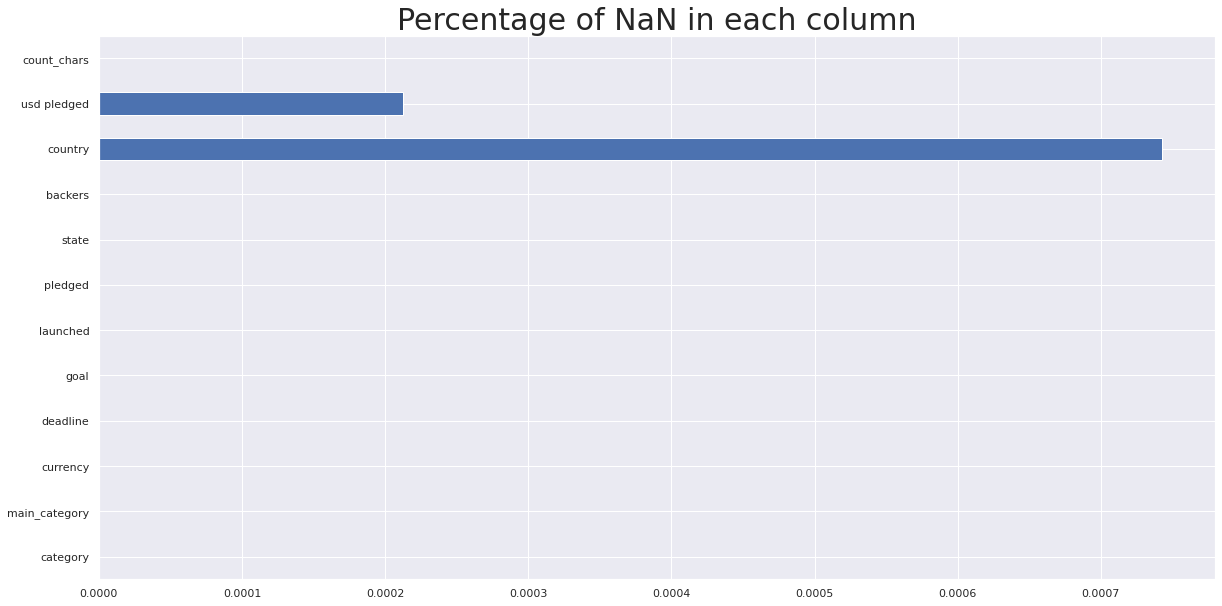

In [21]:
plt.figure(figsize=(20, 10))
df.isnull().mean(axis=0).plot.barh()
plt.title("Percentage of NaN in each column", size=30)
plt.show()

In [22]:
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.isnull().sum(axis=0))

print('\nNumber of duplicates: ', df.duplicated().sum())

category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd pledged      0
count_chars      0
dtype: int64

Number of duplicates:  0


In [23]:
df_without_pledged = df.iloc[np.where((df['usd pledged'] < 1) | (df['pledged'] < 1))[0]]
print('Number of projects without the pledged amount in USD:',
      len(np.where(df_without_pledged['currency'] != 'USD')[0]))

df.drop(np.where(df_without_pledged['currency'] != 'USD')[0], inplace=True)
df.reset_index(drop=True, inplace=True)

Number of projects without the pledged amount in USD: 12917


In [24]:
# Get a conversion factor for each campaign so we can make the currency conversion

factors = []

for idx, currency, pledged, usd_pledged in zip(df.index, df['currency'],
                                               df['pledged'], df['usd pledged']):
    if (usd_pledged > 0) & (pledged > 0):
        if currency != 'USD': 
            factors.append(pledged/usd_pledged)
        else:
            factors.append(1)

    elif pledged > 0:
        df['usd pledged'][idx] = pledged
        factors.append(1)
    
    elif usd_pledged > 0:
        df['pledged'][idx] = usd_pledged
        factors.append(1)
    
    else:
        factors.append(1)

# Generate new features 
df['usd_goal'] = df['goal']*factors
df['year_launched'] = df['launched'].dt.year
df['month_launched'] = df['launched'].dt.month
df['duration'] = (df['deadline'] - df['launched']).dt.days

In [25]:
df['year_launched'].value_counts()

2015    71739
2014    64043
2016    47398
2013    42939
2012    39372
2011    25119
2010    10108
2009     1261
1970        5
Name: year_launched, dtype: int64

In [26]:
# Delete data from the year 1970 (errors)
df = df[df['year_launched'] != 1970]

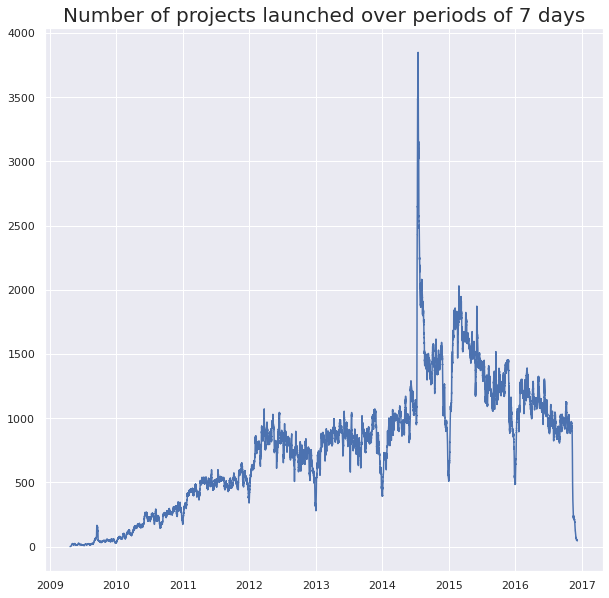

In [27]:
# Count the number of campaigns launched during the past seven days
launched = pd.Series(df.index, index=df.launched, name="count_projects_7_days").sort_index()
count_projects_7_days = launched.rolling('7d').count() - 1

plt.figure(figsize=(10, 10))
plt.plot(count_projects_7_days)
plt.title("Number of projects launched over periods of 7 days", size=20)
plt.show()

In [28]:
# Create the new feature and make it compatible with our indexes
count_projects_7_days.index = launched.values
count_7_days = count_projects_7_days.reindex(df.index)

df['count_projects_7_days'] = count_projects_7_days

In [29]:
# Delete unwanted features for prediction
df.drop(['deadline', 'launched', 'currency', 'backers', 'goal', 'pledged', 
         'usd pledged'], axis=1, inplace=True)

In [30]:
df.head(20)

,category,main_category,state,country,count_chars,usd_goal,year_launched,month_launched,duration,count_projects_7_days
0,Music,Music,failed,US,43,5000.000000,2012,3,30,871.0
1,Film & Video,Film & Video,failed,US,51,19500.000000,2015,7,55,1336.0
2,Food,Food,successful,US,52,1000.000000,2014,12,20,1051.0
3,Drinks,Food,failed,US,42,25000.000000,2016,2,44,1297.0
4,Nonfiction,Publishing,failed,CA,16,2500.000000,2013,9,30,880.0
5,Indie Rock,Music,successful,US,13,12500.000000,2013,3,30,837.0
6,Crafts,Crafts,failed,US,16,5000.000000,2014,9,30,1306.0
7,Games,Games,failed,US,49,200000.000000,2016,2,44,1177.0
8,Design,Design,failed,US,13,2500.000000,2015,1,30,1778.0
9,Comic Books,Comics,failed,US,8,1500.000000,2014,10,30,1446.0


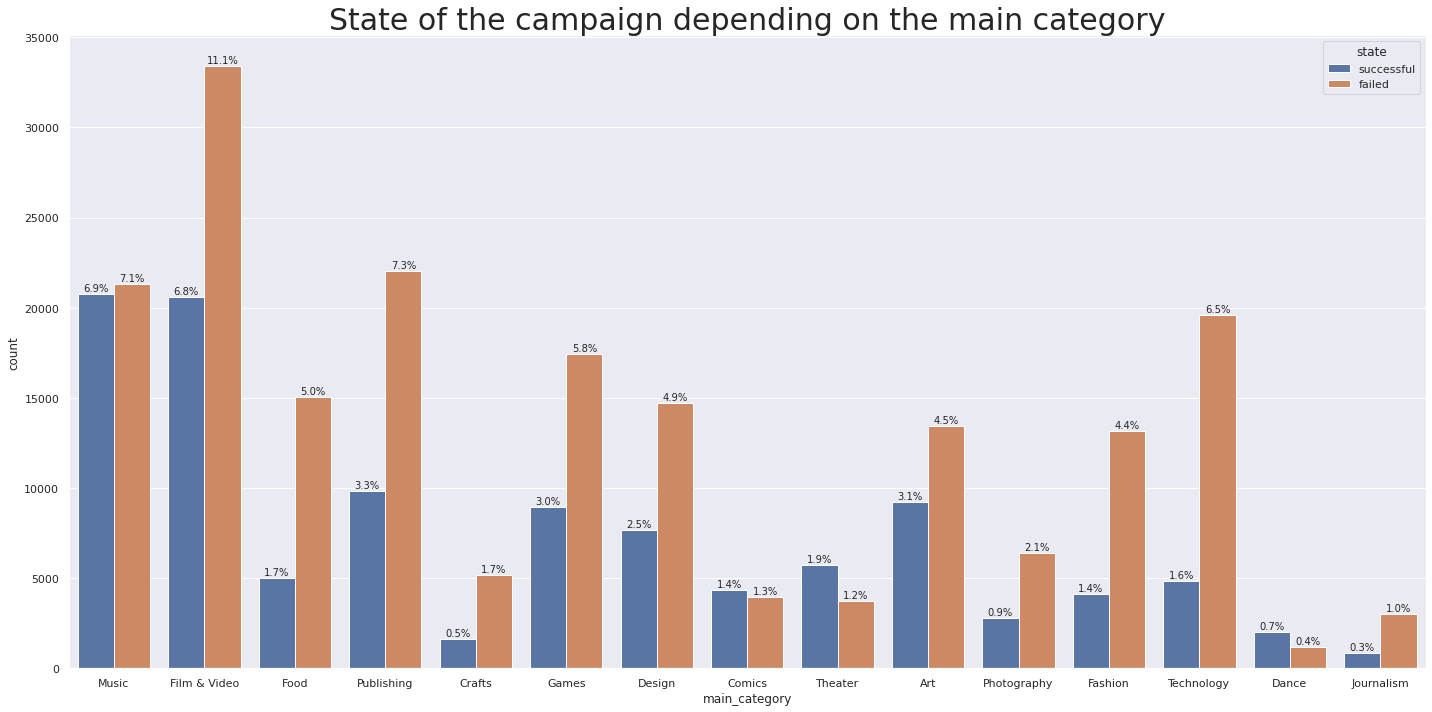

In [31]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='main_category', data=df, hue='state', hue_order=['successful', 'failed'])
plt.title('State of the campaign depending on the main category', size=30)

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

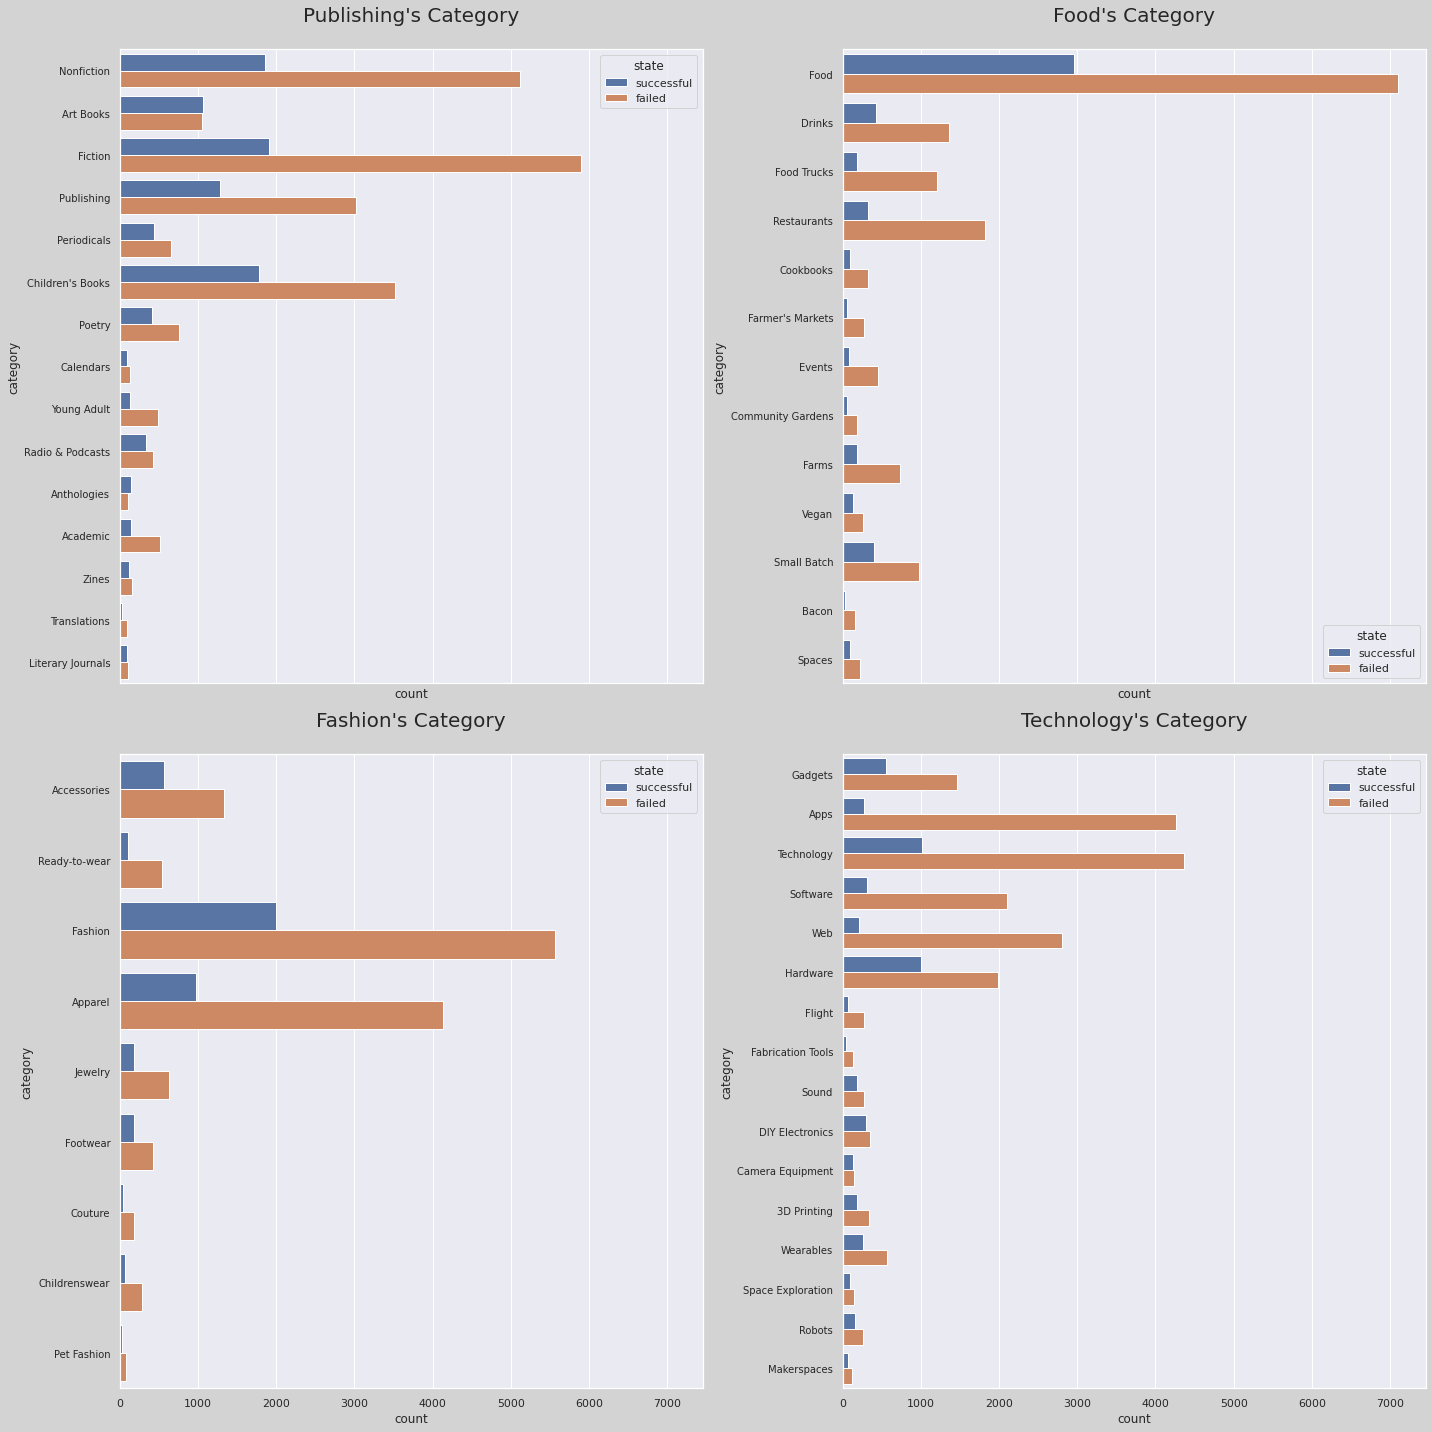

In [32]:
from itertools import product

# State of the campaign depending on the subacategory of a main category

cols = ['Publishing', 'Food',  'Fashion', 'Technology']
indices = product([0, 1], [0, 1])
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True, facecolor='lightgray')

for idx, var in zip(indices, cols):
    var_data = df.query('main_category==@var')
    sns.countplot(y='category', data=var_data, hue='state', 
                  hue_order=['successful', 'failed'], ax=axes[idx[0], idx[1]])
    axes[idx[0], idx[1]].set_title(f"{var}'s Category\n", fontsize=20)
    axes[idx[0], idx[1]].tick_params(axis='y', labelsize=10)


plt.tight_layout()
plt.show()

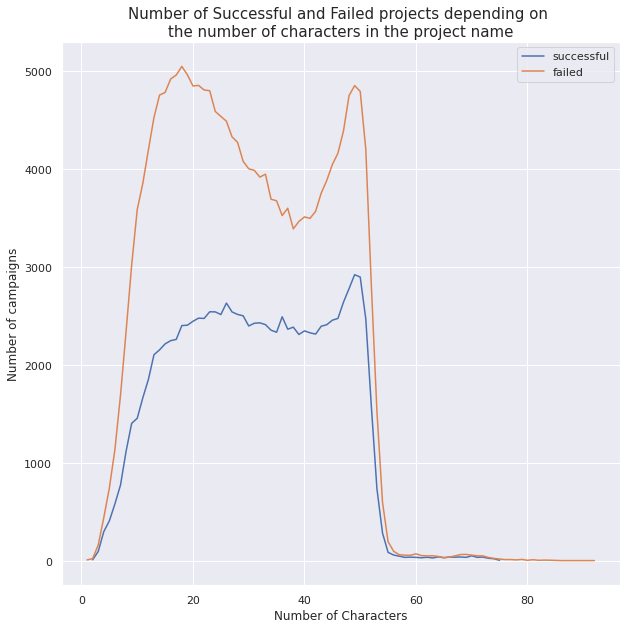

In [33]:
gb_failed = df[df['state']=='failed'].groupby('count_chars')['state'].count()
gb_successful = df[df['state']=='successful'].groupby('count_chars')['state'].count()

plt.figure(figsize=(10, 10))
plt.plot(gb_successful, label='successful')
plt.plot(gb_failed, label='failed')

plt.legend(loc='best')
plt.title('Number of Successful and Failed projects depending on \nthe number of characters in the project name',
          size=15)
plt.xlabel('Number of Characters') 
plt.ylabel('Number of campaigns')
plt.show()

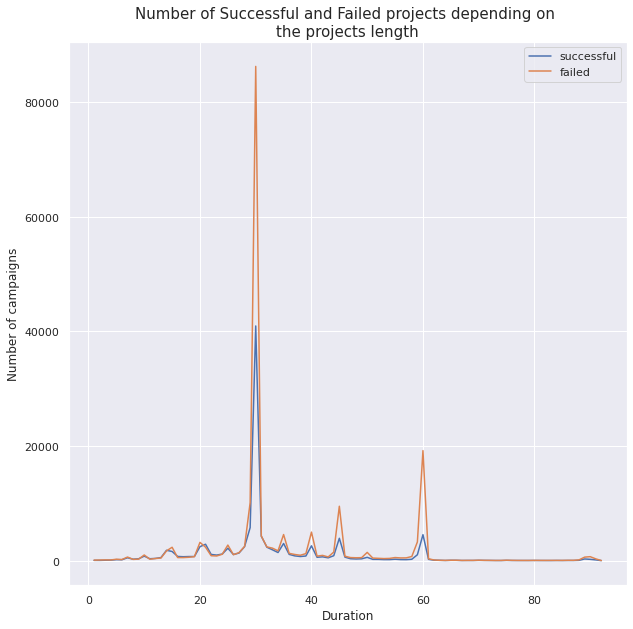

In [34]:
gb_failed = df[df['state']=='failed'].groupby('duration')['state'].count()
gb_successful = df[df['state']=='successful'].groupby('duration')['state'].count()

plt.figure(figsize=(10, 10))
plt.plot(gb_successful, label='successful')
plt.plot(gb_failed, label='failed')
plt.legend(loc='best')
plt.title('Number of Successful and Failed projects depending on \nthe project''s length',
          size=15)
plt.xlabel('Duration') 
plt.ylabel('Number of campaigns')
plt.show()

In [35]:
# Find the name of the main categories that represent 90% of the projects
n_categories = 11
print(df['main_category'].value_counts(1)[:n_categories].sum())
print(df['main_category'].value_counts(1)[:n_categories].index)

0.926809480129413
Index(['Film & Video', 'Music', 'Publishing', 'Games', 'Technology', 'Art',
       'Design', 'Food', 'Fashion', 'Theater', 'Photography'],
      dtype='object')


In [36]:
# Find the name of the categories that represent 90% of the projects
n_categories = 73
print(df['category'].value_counts(1)[:n_categories].sum())
print(df['category'].value_counts(1)[:n_categories].index)

0.9020627262160614
Index(['Product Design', 'Documentary', 'Shorts', 'Music', 'Tabletop Games',
       'Food', 'Video Games', 'Film & Video', 'Fiction', 'Fashion',
       'Nonfiction', 'Theater', 'Art', 'Rock', 'Technology',
       'Children's Books', 'Photography', 'Indie Rock', 'Webseries', 'Apparel',
       'Narrative Film', 'Apps', 'Comics', 'Publishing', 'Web',
       'Country & Folk', 'Crafts', 'Hip-Hop', 'Design', 'Hardware', 'Pop',
       'Painting', 'Public Art', 'Games', 'Software', 'Mixed Media',
       'Classical Music', 'Illustration', 'Animation', 'Restaurants', 'Dance',
       'Art Books', 'Gadgets', 'Performance Art', 'Accessories',
       'Electronic Music', 'Drinks', 'Comic Books', 'World Music',
       'Playing Cards', 'Comedy', 'Drama', 'Jazz', 'Graphic Design',
       'Journalism', 'Sculpture', 'Food Trucks', 'Small Batch', 'Mobile Games',
       'Graphic Novels', 'Poetry', 'Photobooks', 'Periodicals', 'Plays',
       'Digital Art', 'Horror', 'Farms', 'Woodworking'

In [37]:
# Find the name of the countries that represent 90% of the projects

print(df['country'].value_counts(1)[:3].sum())
print(df['country'].value_counts(1)[:3].index)

0.9326410114610619
Index(['US', 'GB', 'CA'], dtype='object')


In [38]:
# One hot encoding

def one_hot_encoding(df, feature, top_values):
    """ Applies one hot encoding on a selected number of values of a feature """
    for value in df[feature].value_counts(1)[:top_values].index:
        df[value] = df[feature].str.contains(value).apply(lambda x:1 if x else 0)

In [39]:
one_hot_encoding(df, 'category', 73)
one_hot_encoding(df, 'main_category', 11)
one_hot_encoding(df, 'country', 3)

In [40]:
df.drop(['category', 'main_category', 'country'], axis=1, inplace=True)

In [41]:
def corr_df(df, corr_val):
    """ Drops features that are strongly correlated to other features """

    # Creates Correlation Matrix and Instantiates
    corr_matrix = df.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j + 1), (i + 1):(i + 2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)
    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = df.iloc[:, (i + 1):(i + 2)].columns.values
        df.drop(col, axis=1, inplace=True)
    return df

In [42]:
corr_df(df, 0.6)

Indie Rock | Rock | 0.67
Web | Webseries | 0.73
Design | Product Design | 0.85
Games | Tabletop Games | 0.6


,state,count_chars,usd_goal,year_launched,month_launched,duration,count_projects_7_days,Product Design,Documentary,Shorts,...,Farms,Woodworking,People,Conceptual Art,DIY,Faith,Wearables,US,GB,CA
0,failed,43,5000.0,2012,3,30,871.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,failed,51,19500.0,2015,7,55,1336.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,successful,52,1000.0,2014,12,20,1051.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,failed,42,25000.0,2016,2,44,1297.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,failed,16,2500.0,2013,9,30,880.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301979,failed,44,50000.0,2014,9,30,1399.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
301980,failed,8,1500.0,2011,6,27,487.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
301981,failed,61,15000.0,2010,7,45,224.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
301982,failed,22,15000.0,2016,1,30,1005.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# **Modeling and Evaluation**

# **Models:**
- Logistic Regression
- Rndom Forest Classifier
- XGBoost Classifier

# **Metrics:**
- Accuracy
- AUC

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV

from xgboost import XGBClassifier

In [44]:
# X: input, y: target variable
X = df.drop('state', axis=1)
y = df['state'].replace({'failed': 0, 'successful': 1})

In [45]:
# 60/20/20 + Stratified (Training/Validation/Test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,
                                                  stratify=y_train, random_state=42)

In [46]:
# Logistic Regression using RandomizedSearch cross-validation

lr  = LogisticRegression(random_state=42)
param_dist = {'C': np.arange(0.01, 10, 0.5)}

rs_lr = RandomizedSearchCV(lr, param_dist, scoring='accuracy', cv=5, random_state=42)
rs_lr.fit(X_train, y_train)

rs_lr_score = rs_lr.score(X_val, y_val)*100
print('The selected RF Classifier model: ', rs_lr.best_estimator_)
print("Accuracy of LR model on vaidation dataset: {:.2f}%".format(rs_lr_score))

The selected RF Classifier model:  LogisticRegression(C=8.51, random_state=42)
Accuracy of LR model on vaidation dataset: 64.04%


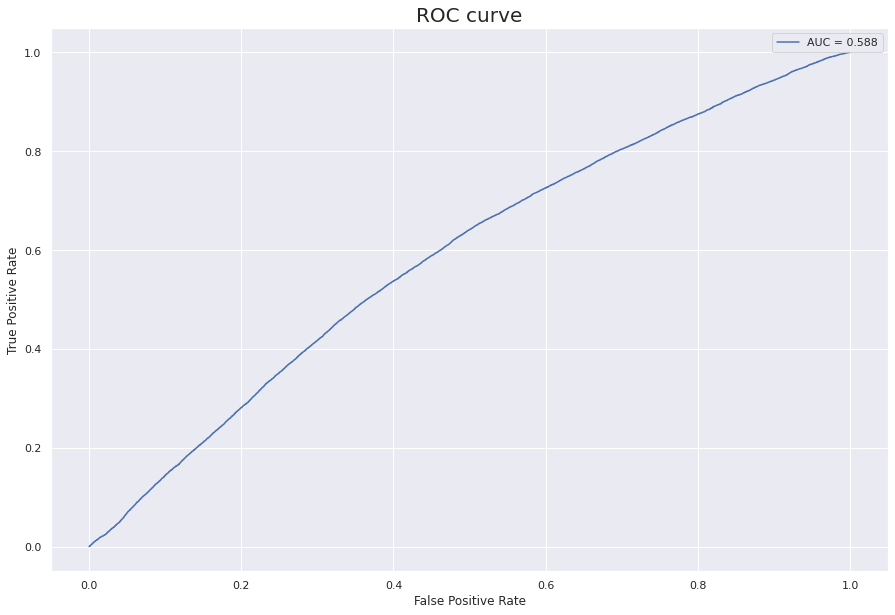

In [47]:
#ROC curve
pred = rs_lr.predict_proba(X_val)[::,1]
fpr, tpr, thresholds = roc_curve(y_val, pred)
auc_score = roc_auc_score(y_val, pred)

plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve', size=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [48]:
# Random Forest Classifier using RandomizedSearch cross-validation

rfc = RandomForestClassifier(random_state=42)
param_grid = {"max_features": np.linspace(1,10,10, dtype=int),
              "min_samples_leaf": np.linspace(1, 50, 50, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int),
              "n_estimators":[100, 200, 300]}

rs_rfc = RandomizedSearchCV(rfc, param_grid, scoring='accuracy', n_iter=5, random_state=42)
rs_rfc.fit(X_train, y_train)

rs_rfc_score = rs_rfc.score(X_val, y_val)*100
print('The selected RF Classifier model: ', rs_rfc.best_estimator_)
print("Accuracy of RF model on vaidation dataset: {:.2f}%".format(rs_rfc_score))

The selected RF Classifier model:  RandomForestClassifier(max_features=6, min_samples_leaf=20, min_samples_split=4,
                       n_estimators=200, random_state=42)
Accuracy of RF model on vaidation dataset: 69.69%


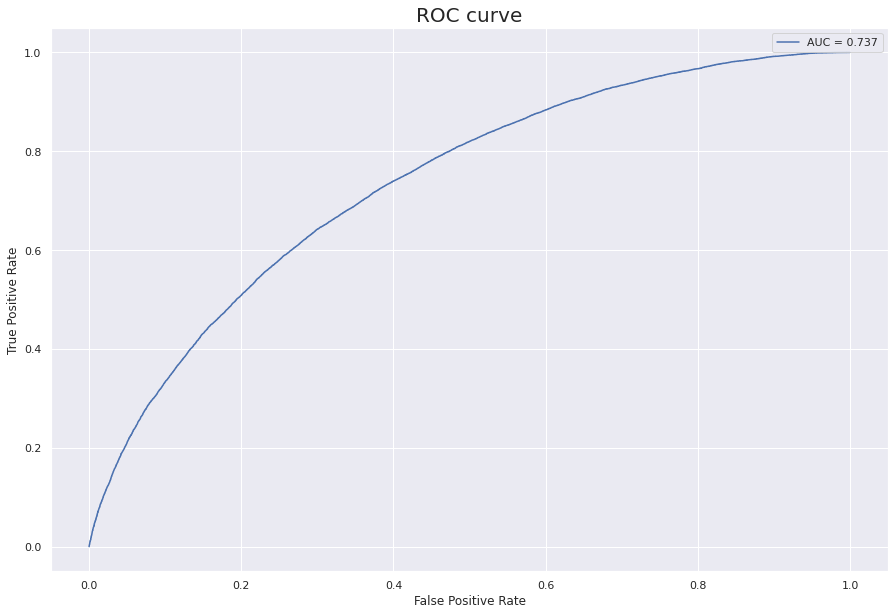

In [49]:
#ROC curve
pred = rs_rfc.predict_proba(X_val)[::,1]
fpr, tpr, thresholds = roc_curve(y_val, pred)
auc_score = roc_auc_score(y_val, pred)

plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve', size=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

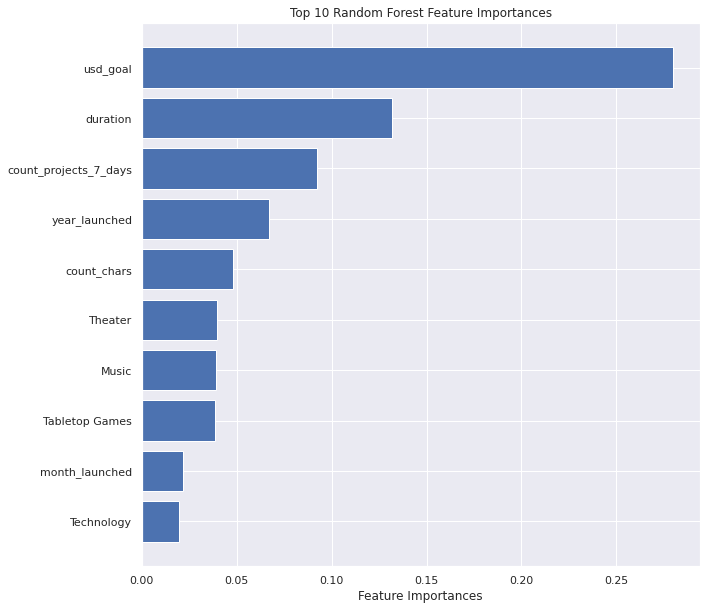

In [50]:
# Top 10 Random Forest Feature Importances 

rf = RandomForestClassifier(max_features=10, min_samples_leaf=47,
                       min_samples_split=10, n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

sorted_idx = rf.feature_importances_.argsort()[-10:]
plt.figure(figsize=(10,10))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title('Top 10 Random Forest Feature Importances')
plt.xlabel("Feature Importances")
plt.show()

In [51]:
# XGB Classifier using RandomizedSearch cross-validation

xgbc = XGBClassifier(random_state=42)
param_grid = {'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30], 
          'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15], 
          'min_child_weight' : [ 1, 3, 5, 7 ], 
          'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], 
          'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]}

rs_xgbc = RandomizedSearchCV(xgbc, param_grid, scoring='accuracy', n_iter=5, random_state=42)
rs_xgbc.fit(X_train, y_train)

rs_xgbc_score = rs_xgbc.score(X_val, y_val)*100
print('The selected XGB Classifier model: ', rs_xgbc.best_estimator_)
print("Accuracy of XGB model on vaidation dataset: {:.2f}%".format(rs_xgbc_score))

The selected XGB Classifier model:  XGBClassifier(colsample_bytree=0.7, gamma=0.3, max_depth=8, min_child_weight=7,
              random_state=42)
Accuracy of XGB model on vaidation dataset: 70.32%


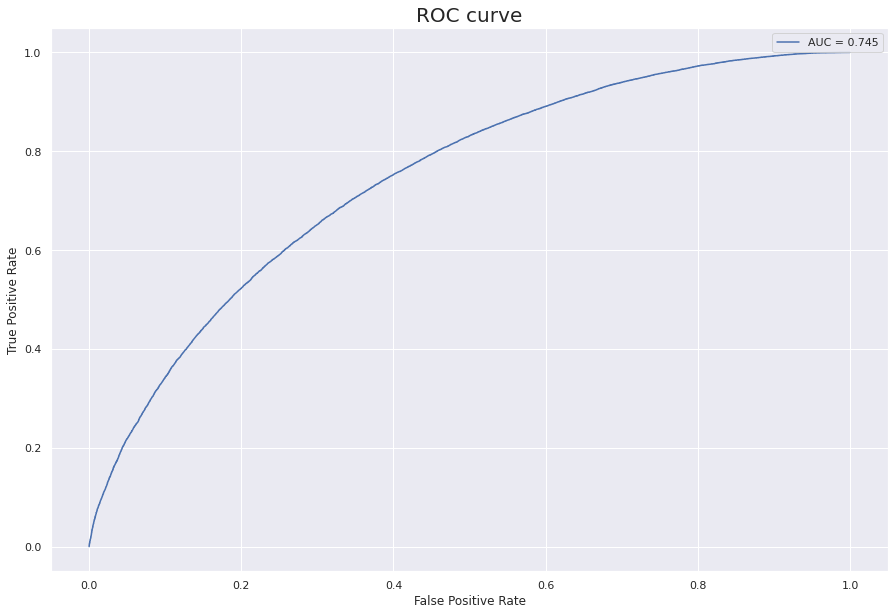

In [52]:
#ROC curve
pred = rs_xgbc.predict_proba(X_val)[::,1]
fpr, tpr, thresholds = roc_curve(y_val, pred)
auc_score = roc_auc_score(y_val, pred)

plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve', size=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

In [53]:
# Selected model (XGB Classifier) performance on test set
y_pred = rs_xgbc.predict(X_test)
test_accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of our best model on test dataset: {:.2f}%".format(test_accuracy))

Accuracy of our best model on test dataset: 70.26%


# **Recommendations**

## **Project**
The main things to look at before launching your project on kickstarter are:
- The duration of the kisckstarter campaign (Avoid 30-60 days, make it either short or long)
- The name of your project (around 20 characters looks to be the perfect option)
- The type of your project (Music projects are the ones with the highest rate of success, however there is a large disparity inside main categories. Ex: DIY electronics projects have a good success rate (similar to music) while being part of a category that doesn't perform well (Technology's category))
- The number of projects that have been launched during the last 7 days